In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4867,ham,"Watching cartoon, listening music &amp; at eve...",NaN,NaN,NaN
2234,ham,What's your room number again? Wanna make sure...,NaN,NaN,NaN
4555,ham,Gettin rdy to ship comp,NaN,NaN,NaN
292,ham,Oops. 4 got that bit.,NaN,NaN,NaN
329,ham,I'm reading the text i just sent you. Its mean...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
#1. Data Cleaning
#2. EDA
#3. Text preprocessing
#4. Model Building
#5. Evaluation
#6. Improvements
#7. Websits
#8. Deploy

In [9]:
#df = df.apply("to_numeric")

### 1. Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# drop last three columns

In [12]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [14]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [16]:
df.sample(3)

,target,text
2633,ham,That's what I love to hear :V see you sundayis...
3546,spam,Rock yr chik. Get 100's of filthy films &XXX p...
4887,ham,You have to pls make a note of all she.s expos...


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [19]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [23]:
# check for duplicates values
df.duplicated().sum()

0

In [21]:
df = df.drop_duplicates(keep='first')

In [22]:
df.shape

(5169, 2)

### 2. EDA

In [24]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [25]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

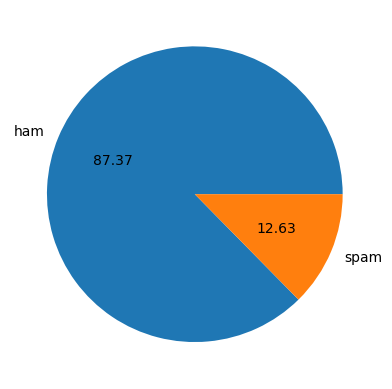

In [26]:
# value counts in pie chart
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [27]:
# Data is imbalanced

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tusud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
#num of char in text
df['num_char'] = df['text'].apply(len)

In [32]:
# num of words in text
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [33]:
# num of sentences in text
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [34]:
df.head(3)

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [35]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#ham
df[df['target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
#spam
df[df['target'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
## visualisation of ham and spam through histogram

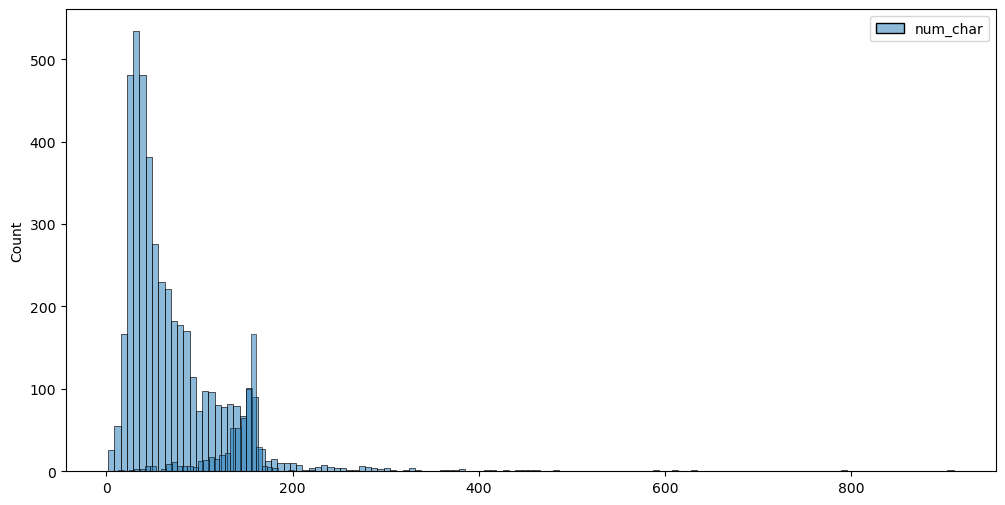

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0][['num_char']])
sns.histplot(df[df['target'] == 1][['num_char']],color="red")
plt.show()

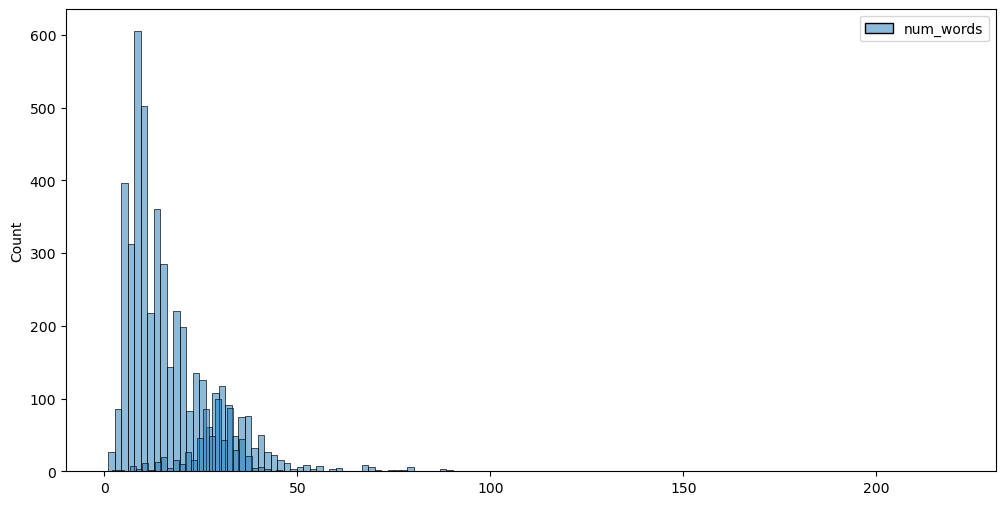

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0][['num_words']])
sns.histplot(df[df['target'] == 1][['num_words']],color="red")
plt.show()

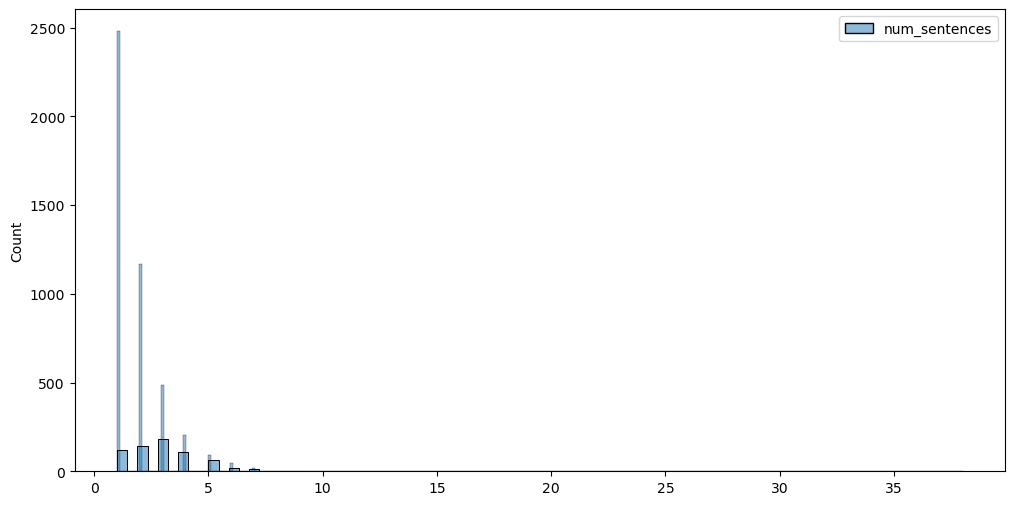

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0][['num_sentences']])
sns.histplot(df[df['target'] == 1][['num_sentences']],color="red")
plt.show()

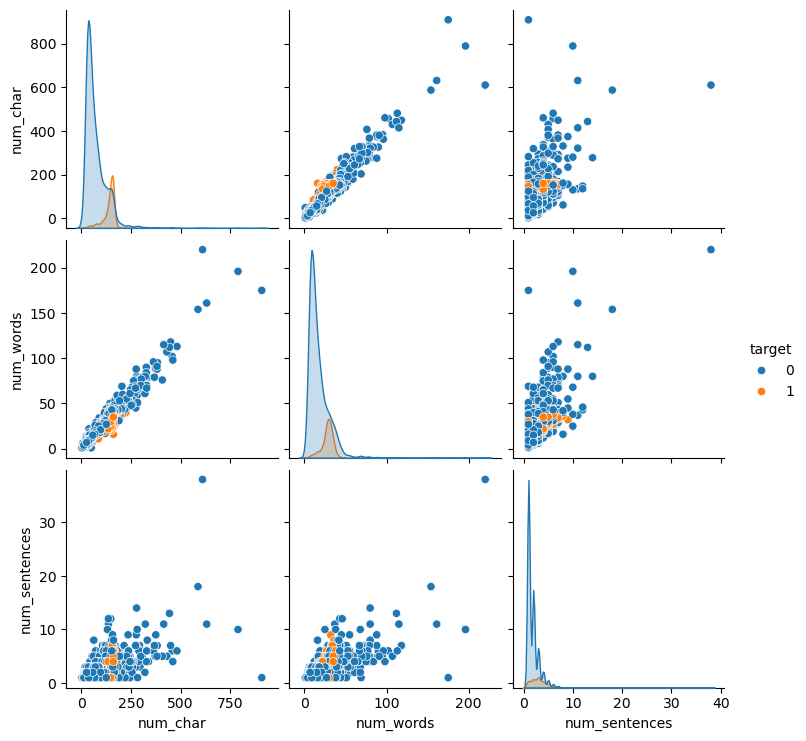

In [35]:
sns.pairplot(df, hue='target')
plt.show()

In [42]:
df.head(3)

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [43]:
new_df = df.drop(columns=['text'])

In [44]:
new_df.corr()

,target,num_char,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_char,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


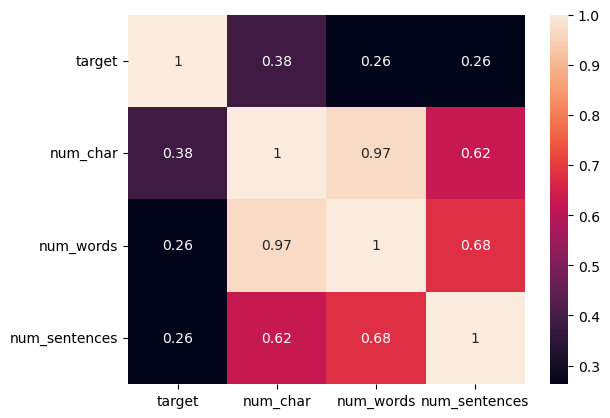

In [45]:
#heatmap of the correlation
sns.heatmap(new_df.corr(), annot=True)
plt.show()

### 3. Data Preprocessing
- Lower Case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


In [56]:
from nltk.corpus import stopwords
 
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tusud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [59]:
transform_text("HI How Are # You Nitish?")

'hi nitish'

In [60]:
transform_text('did you like my presentation on ML?')

'like present ml'

In [61]:
transform_text('I loved the YT lectures on Machine Learning, How about you?')

'love yt lectur machin learn'

In [62]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [63]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [64]:
df['transformed_text'] = df['text'].apply(transform_text)

In [65]:
df.head(3)

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [86]:
#!pip install wordcloud

In [85]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='skyblue')

In [86]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

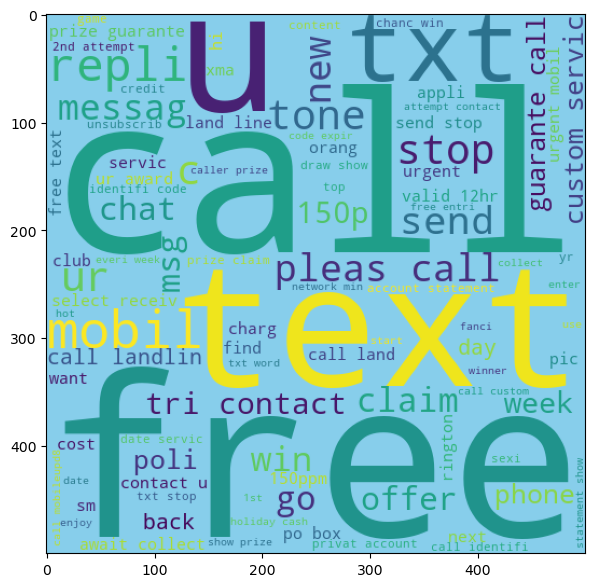

In [87]:
plt.figure(figsize=(12,7))
plt.imshow(spam_wc)
plt.show()

In [88]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

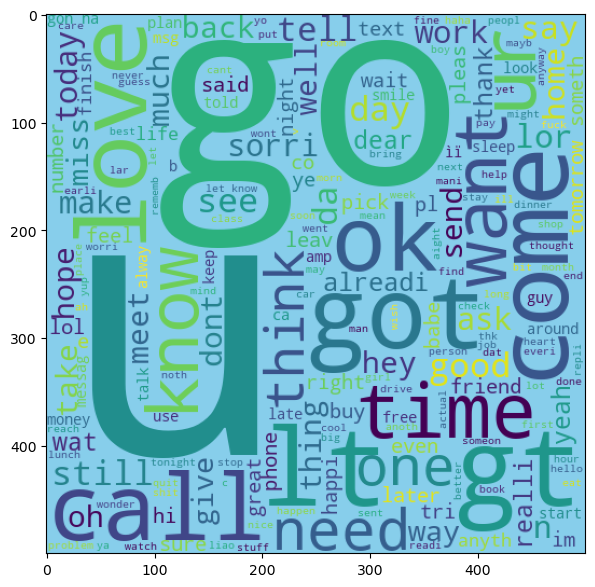

In [89]:
plt.figure(figsize=(12,7))
plt.imshow(ham_wc)
plt.show()

In [90]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [91]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
        

In [92]:
len(spam_corpus)

9939

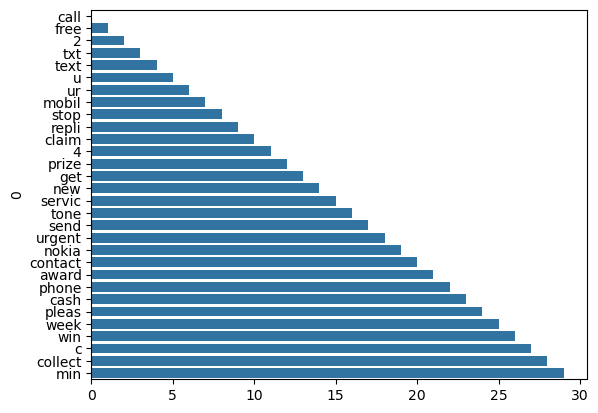

In [93]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.yticks(rotation = "horizontal")
plt.show()

In [94]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [95]:
len(ham_corpus)

35404

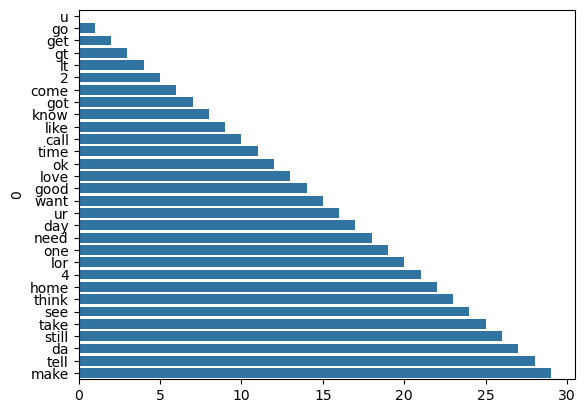

In [96]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.yticks(rotation = "horizontal")
plt.show()

In [97]:
df.head(3)

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


### 4. Model Building

In [99]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [140]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [141]:
X.shape

(5169, 3000)

In [142]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [145]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [146]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [147]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [148]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [149]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [150]:
# tfidf - mnb

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [152]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty ='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [153]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    "DT":dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [154]:
def train_classifier(clfs, X_train, y_train, X_test,y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [155]:
train_classifier(svc,X_train, y_train, X_test,y_test)

(0.97678916827853, 0.9548872180451128)

In [156]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print('For', name)
    print('Accuracy -',current_accuracy)
    print('Precision -',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy - 0.97678916827853
Precision - 0.9548872180451128
For KN
Accuracy - 0.9042553191489362
Precision - 1.0
For NB
Accuracy - 0.9729206963249516
Precision - 0.9915966386554622
For DT
Accuracy - 0.9332688588007737
Precision - 0.8275862068965517
For LR
Accuracy - 0.9468085106382979
Precision - 0.8688524590163934
For RF
Accuracy - 0.971953578336557
Precision - 0.9754098360655737
For AdaBoost
Accuracy - 0.9506769825918762
Precision - 0.8671875
For BgC
Accuracy - 0.9622823984526112
Precision - 0.8840579710144928
For ETC
Accuracy - 0.9777562862669246
Precision - 0.9841269841269841
For GBDT
Accuracy - 0.9468085106382979
Precision - 0.96875
For xgb
Accuracy - 0.9680851063829787
Precision - 0.9375


In [157]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores})

In [158]:
performance_df.sort_values(by=['Precision'], ascending=False)

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.972921,0.991597
8,ETC,0.977756,0.984127
5,RF,0.971954,0.975410
9,GBDT,0.946809,0.968750
0,SVC,0.976789,0.954887
10,xgb,0.968085,0.937500
7,BgC,0.962282,0.884058
4,LR,0.946809,0.868852
6,AdaBoost,0.950677,0.867188


#### Model Improving

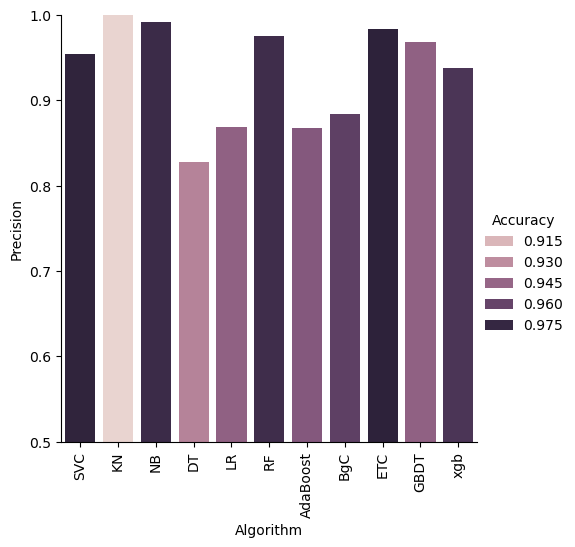

In [159]:
sns.catplot(x = 'Algorithm', y='Precision', 
               hue = 'Accuracy',data=performance_df, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

##### model improve
- 1. change the max_feature parameter of tfidf

In [160]:
temp_df = pd.DataFrame({"Algorithm":clfs.keys(), "Accuracy_max_ft_3000":accuracy_scores, 'Precision_Score':precision_scores})

In [161]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_Score
0,SVC,0.976789,0.954887
1,KN,0.904255,1.000000
2,NB,0.972921,0.991597
3,DT,0.933269,0.827586
4,LR,0.946809,0.868852
5,RF,0.971954,0.975410
6,AdaBoost,0.950677,0.867188
7,BgC,0.962282,0.884058
8,ETC,0.977756,0.984127
9,GBDT,0.946809,0.968750


- 2.using min_max_scaler

In [164]:
# which is not that effective

- 3.adding extra column num_char into input X

In [163]:
# It leads to decrease in accuracy

In [165]:
import pickle
pickle.dump(tfidf, open('vectorizer.plk', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))